<a href="https://colab.research.google.com/github/bsaha205/asd/blob/main/ASD_Detection_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots # Changed import to make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading dataset
adu = pd.read_csv("/content/drive/MyDrive/Autism_disorder/Autism-Adult-Data.csv",na_values=['?'])

In [ ]:
#Adults
adu.sample(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
497,0,1,1,1,1,1,1,0,1,1,...,m,Asian,no,no,India,no,8,'18 and more',Self,YES
578,1,1,1,1,1,0,0,1,1,1,...,f,White-European,no,yes,'United Kingdom',no,8,'18 and more',Self,YES
693,1,0,0,1,0,0,0,1,0,1,...,f,White-European,no,no,'United Kingdom',no,4,'18 and more',Self,NO
249,1,0,0,1,1,1,1,1,1,1,...,m,'South Asian',no,no,'New Zealand',no,8,'18 and more',Self,YES
309,1,1,1,1,1,1,0,1,0,0,...,f,'Middle Eastern ',no,no,'United Kingdom',no,7,'18 and more',Self,YES


In [ ]:
# Number of tuples and fields
print("Adults      :",adu.shape)

Adults      : (704, 21)


In [ ]:
#Adults
adu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        609 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [ ]:
#Adults
adu.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [ ]:
#Total number of missing values in each dataset
print("Total no. of missing values in Adults's dataset     : ",adu.isnull().sum().sum())

Total no. of missing values in Adults's dataset     :  192


In [ ]:
#Adults
adu.isnull().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


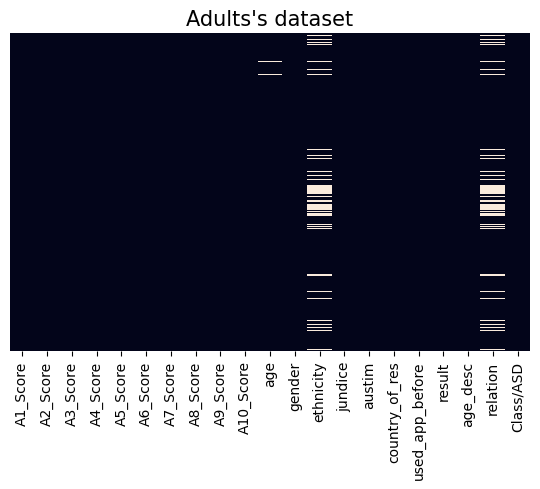

In [ ]:
fig, ax = plt.subplots(figsize=(5.5,5))

sns.heatmap(adu.isnull(),yticklabels=False,cbar=False,cmap='rocket',ax=ax)
ax.set_title("Adults's dataset",fontsize = 15)
fig.tight_layout()
plt.savefig('heatmap_adu.pdf', transparent=True, dpi=300)

In [ ]:
#ASD or Not
#Check the column names in the dataframe
print(adu.columns)
# Replace 'Class/ASD' with the actual column name from the output above
# The line below previously had 'Class/ASD'. It is being changed to 'Class/ASD Traits '
# based on the output of the print(adu.columns) command. This assumes 'Class/ASD Traits '
# is the intended column. Please verify this against the actual column names printed.
actual_column_name = 'Class/ASD'

print("\nNo of adults diagonised with ASD = ",len(adu[adu[actual_column_name] == 'YES']))
print("No of adults not diagonised with ASD = ",len(adu[adu[actual_column_name] == 'NO']))


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'country_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

No of adults diagonised with ASD =  189
No of adults not diagonised with ASD =  515


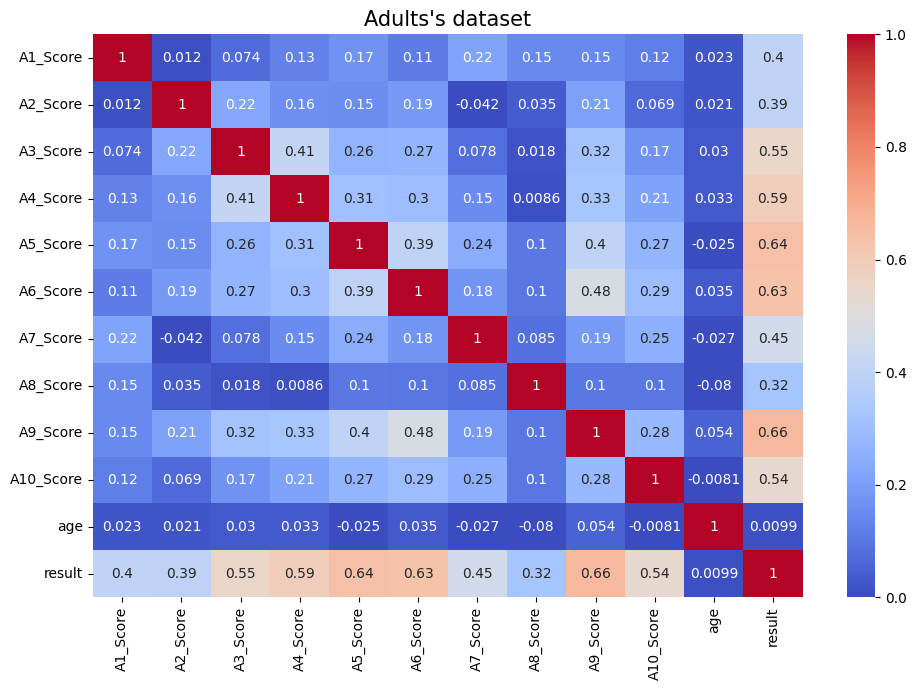

In [ ]:

# Select only numeric columns
numeric_data = adu.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1, ax=ax)
ax.set_title("Adults's dataset", fontsize=15)
fig.tight_layout()

# Save the figure
plt.savefig('correlation_adu.pdf', transparent=True, dpi=300)

plt.show()

In [ ]:
#Imputing missing values of categorical features with mode
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

adu.ethnicity = imputer_mode.fit_transform(adu.ethnicity.values.reshape(-1,1))[:,0]
adu.relation = imputer_mode.fit_transform(adu.relation.values.reshape(-1,1))[:,0]

#Imputing missing values of numerical features with mean
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='mean')
adu.age = imputer_mode.fit_transform(adu.age.values.reshape(-1,1))[:,0]

In [ ]:
print("After imputing,\nNo of missing values in Adults's dataset      = ",adu.isnull().sum().sum())

After imputing,
No of missing values in Adults's dataset      =  0


In [ ]:
print("Number of duplicate rows:", adu.duplicated().sum())
adu = adu.drop_duplicates()
print("Number of duplicate rows:", adu.duplicated().sum())


Number of duplicate rows: 5
Number of duplicate rows: 0


In [ ]:
#Since age of toddlers are represented in months, age(in years) of adults is converted to age in months.
adu.rename(columns = {'age':'Age_Mons'}, inplace = True)

adu['Age_Mons'] = adu['Age_Mons']*12

### **Model fitting**

*Spliting dependent and independent features*


In [ ]:
shuffled_data = adu.sample(frac=1,random_state=4)
ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'YES']
non_ASD_data = shuffled_data.loc[shuffled_data['Class/ASD'] == 'NO'].sample(n=189)
adu= pd.concat([ASD_data, non_ASD_data])

In [ ]:
# Split the data into features and target label
raw_target= adu['Class/ASD']
raw_features = adu[['A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score','A9_Score','A10_Score','Age_Mons', 'gender', 'ethnicity', 'jundice', 'austim', 'country_of_res','relation']]

*Feature Scaling*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['Age_Mons']

features_minmax_transform = pd.DataFrame(data = raw_features)
features_minmax_transform[num_features] = scaler.fit_transform(raw_features[num_features])

In [ ]:
features_minmax_transform.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age_Mons,gender,ethnicity,jundice,austim,country_of_res,relation
444,0,1,1,1,1,1,0,1,0,1,0.049180,f,White-European,no,yes,Sweden,Self
430,1,1,1,1,1,1,1,0,1,1,0.040984,f,Black,no,no,France,Parent
544,1,0,1,1,1,1,1,1,1,1,0.049180,f,White-European,yes,no,'United Kingdom',Self
576,1,1,0,0,1,1,1,1,1,1,0.008197,m,White-European,no,no,'United Kingdom',Self
672,1,1,1,1,1,0,1,1,0,1,0.010929,m,White-European,no,no,Ireland,Self


##Encoding Categorical variables

In [ ]:
features = pd.get_dummies(features_minmax_transform)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(raw_target)

*Function for Evaluation*

In [ ]:
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score,
    roc_curve, auc, log_loss, confusion_matrix
)

def model_report(y_act, y_pred):
    # Convert labels to numeric if necessary
    if isinstance(y_act.iloc[0], str):  # If y_act contains 'YES'/'NO'
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()
        y_pred = lb.transform(y_pred).ravel()

    print("Accuracy =", accuracy_score(y_act, y_pred))
    print("Precision =", precision_score(y_act, y_pred))
    print("Recall/Sensitivity =", recall_score(y_act, y_pred))

    # Confusion matrix calculations
    confusion = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = confusion.ravel()
    specificity = TN / (TN + FP)
    print("Specificity =", specificity)
    print("F1 Score =", f1_score(y_act, y_pred))

    # AUC calculation
    false_positive_rate, true_positive_rate, _ = roc_curve(y_act, y_pred)
    print("AUC Score =", auc(false_positive_rate, true_positive_rate))

    print("Kappa Score =", cohen_kappa_score(y_act, y_pred))
    print("Log Loss =", log_loss(y_act, y_pred), "\n")


In [ ]:
def model_reports(y_act, y_pred):
    import numpy as np
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, cohen_kappa_score, confusion_matrix

    # Convert y_act to NumPy array if not already
    y_act = np.array(y_act) if isinstance(y_act, list) else y_act
    y_pred = np.array(y_pred) if isinstance(y_pred, list) else y_pred

    # Convert categorical labels ('YES', 'NO') to numeric if necessary
    if isinstance(y_act[0], str):
        lb = LabelBinarizer()
        y_act = lb.fit_transform(y_act).ravel()

    # Compute Metrics
    accuracy = accuracy_score(y_act, y_pred)
    precision = precision_score(y_act, y_pred)
    recall = recall_score(y_act, y_pred)
    f1 = f1_score(y_act, y_pred)

    # Compute confusion matrix for specificity
    conf_matrix = confusion_matrix(y_act, y_pred)
    TN, FP, FN, TP = conf_matrix.ravel()
    specificity = TN / (TN + FP)

    # Compute AUC Score
    auc_score = roc_auc_score(y_act, y_pred)

    # Compute Cohen’s Kappa Score
    kappa = cohen_kappa_score(y_act, y_pred)

    # Compute Log Loss
    logloss = log_loss(y_act, y_pred)

    # Print Metrics
    print("\n=== Model Evaluation ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score:.4f}")
    print(f"Cohen’s Kappa: {kappa:.4f}")
    print(f"Log Loss: {logloss:.4f}\n")


In [ ]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


##Spliting Data


In [ ]:
X = features
y = target

print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (376, 80)
y.shape: (376,)
X:      A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
444         0         1         1         1         1         1         0   
430         1         1         1         1         1         1         1   
544         1         0         1         1         1         1         1   
576         1         1         0         0         1         1         1   
672         1         1         1         1         1         0         1   
..        ...       ...       ...       ...       ...       ...       ...   
616         1         0         0         0         1         0         1   
631         0         0         0         0         0         0         1   
30          0         0         0         0         0         0         0   
349         1         1         1         0         0         0         0   
14          1         0         0         0         0         0         1   

     A8_Score  A9_Score  A10_Score  .

## Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# One-hot encoding categorical features
features = pd.get_dummies(features_minmax_transform)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(raw_target)

# Train Random Forest for feature selection
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(features, y)

# Select top features based on importance
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Select top `k` features
k = 15  # Adjust as needed
selected_features = features.columns[sorted_indices[:k]]

# Create a DataFrame to store feature names and their importance scores
feature_scores = pd.DataFrame({
    'Feature': features.columns,
    'Importance Score': feature_importances
})

# Sort by importance score in descending order
feature_scores = feature_scores.sort_values(by='Importance Score', ascending=False)

# Print top k features with their scores
print(feature_scores.head(k))

actual_selected_features = [
    "A9_Score", "A5_Score", "A6_Score", "A3_Score", "A4_Score",
    "A10_Score", "A7_Score", "Age_Mons", "A2_Score", "A1_Score", "A8_Score" ]

# Ensure selected features exist in the DataFrame
existing_features = [f for f in actual_selected_features if f in features.columns]

# Initialize X with selected features
X = features[existing_features]
y = adu['Class/ASD']

                                  Feature  Importance Score
4                                A5_Score          0.179605
8                                A9_Score          0.139327
5                                A6_Score          0.107170
3                                A4_Score          0.091209
6                                A7_Score          0.049015
10                               Age_Mons          0.044606
0                                A1_Score          0.043223
2                                A3_Score          0.042637
9                               A10_Score          0.036673
1                                A2_Score          0.035957
7                                A8_Score          0.027027
22               ethnicity_White-European          0.013234
34         country_of_res_'United States'          0.011511
32  country_of_res_'United Arab Emirates'          0.011122
15                        ethnicity_Asian          0.010273


In [ ]:
#Splitting the data into train test spit
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print('X.shape:', X.shape)
print('y.shape:', y.shape)
print('X:', X)

X.shape: (376, 11)
y.shape: (376,)
X:      A9_Score  A5_Score  A6_Score  A3_Score  A4_Score  A10_Score  A7_Score  \
444         0         1         1         1         1          1         0   
430         1         1         1         1         1          1         1   
544         1         1         1         1         1          1         1   
576         1         1         1         0         0          1         1   
672         0         1         0         1         1          1         1   
..        ...       ...       ...       ...       ...        ...       ...   
616         0         1         0         0         0          0         1   
631         0         0         0         0         0          1         1   
30          0         0         0         0         0          0         0   
349         0         0         0         1         0          1         0   
14          0         0         0         0         0          1         1   

     Age_Mons  A2_Score  

##KNeighborsClassifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = [int(x) for x in np.linspace(1,1000,10)]
weights = ['uniform','distance']
algorithm =['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [int(x) for x in np.linspace(1,1000,10)]

random_grid = {'n_neighbors':n_neighbors,
               'weights':weights,
               'algorithm':algorithm,
               'leaf_size':leaf_size}
print(random_grid)

{'n_neighbors': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier()
knn_randomcv=RandomizedSearchCV(estimator= knn, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
knn_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 112, 223, 334, 445,
                                                      556, 667, 778, 889,
                                                      1000],
                                        'n_neighbors': [1, 112, 223, 334, 445,
                                                        556, 667, 778, 889,
                                                        1000],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, verbose=2)

In [ ]:
print('\n Best estimator:')
print(knn_randomcv.best_estimator_)


 Best estimator:
KNeighborsClassifier(algorithm='kd_tree', leaf_size=778, n_neighbors=223,
                     weights='distance')


In [ ]:
print('\n Best hyperparameters:')
print(knn_randomcv.best_params_)


 Best hyperparameters:
{'weights': 'distance', 'n_neighbors': 223, 'leaf_size': 778, 'algorithm': 'kd_tree'}


In [ ]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(weights='uniform', n_neighbors= 1, leaf_size=445, algorithm='brute')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=445, n_neighbors=1)

In [ ]:
# Ensure that the best model exists before fitting
if knn_randomcv.best_estimator_ is not None:
    knn = knn_randomcv.best_estimator_
    knn.fit(X_train, y_train)  # Fit the model
else:
    raise ValueError("Error: No best estimator found in RandomizedSearchCV. Please check your hyperparameter tuning process.")


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred_knn = knn.predict(X_train)

# Predict on testing data
y_test_pred_knn = knn.predict(X_test)

# Compute accuracy
train_acc_knn = accuracy_score(y_train, y_train_pred_knn)
test_acc_knn = accuracy_score(y_test, y_test_pred_knn)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_knn * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_knn * 100:.2f}%")

model_report(y_test, y_test_pred_knn)


Training Accuracy: 100.00%
Testing Accuracy: 89.47%
Accuracy = 0.8947368421052632
Precision = 0.8367346938775511
Recall/Sensitivity = 1.0
Specificity = 0.7714285714285715
F1 Score = 0.9111111111111111
AUC Score = 0.8857142857142858
Kappa Score = 0.784549964564139
Log Loss = 3.794068777801806 



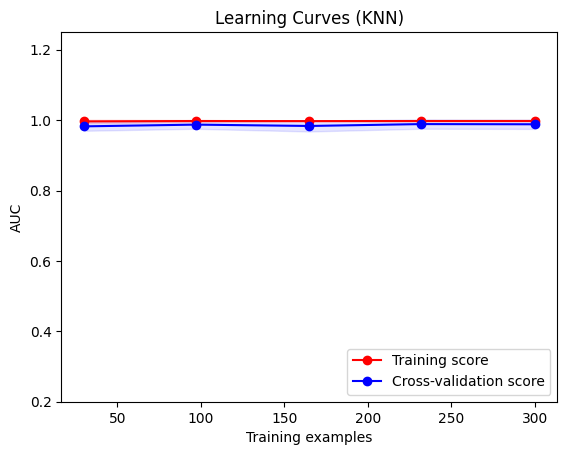

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define title for the plot
title = "Learning Curves (KNN)"

# Define cross-validation strategy
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Initialize the KNN model with optimal hyperparameters
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Adjust parameters if needed

# Plot the learning curve
plot_learning_curve(knn, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)

# Save the plots
plt.savefig('KNN_curve.pdf', transparent=True, dpi=300)
plt.savefig('KNN_curve.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


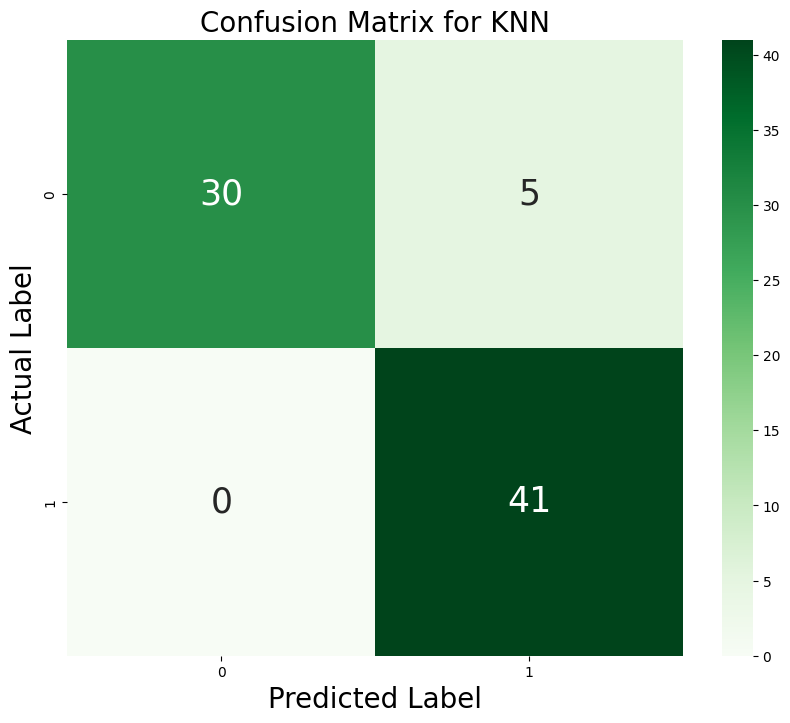

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the KNN model (if not already trained)
knn.fit(X_train, y_train)  # Ensure the model is trained

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})

# Formatting
plt.title('Confusion Matrix for KNN', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)

# Save the confusion matrix
plt.savefig('KNN_confusion.pdf', transparent=True, dpi=300)
plt.savefig('KNN_confusion.eps', transparent=True, dpi=300)

# Show plot
plt.show()


##SVM Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

C = [int(x) for x in np.linspace(start = 1, stop = 20, num = 10)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]

random_grid = {'C':C,
               'kernel':kernel,
               'degree':degree}
print(random_grid)

{'C': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc_randomcv=RandomizedSearchCV(estimator= svc, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
svc_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 3, 5, 7, 9, 11, 13, 15, 17,
                                              20],
                                        'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(svc_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00342345, 0.00489411, 0.00547094, 0.00320621, 0.00303659,
       0.00551629, 0.00280223, 0.00297914, 0.00549498, 0.00290308,
       0.00292645, 0.00280499, 0.00501156, 0.00724578, 0.00450401,
       0.01067605, 0.00290985, 0.00560322, 0.00307403, 0.00610824,
       0.0032052 , 0.0061821 , 0.00699444, 0.00286689, 0.00288596,
       0.00704365, 0.00605669, 0.00587263, 0.0029304 , 0.00566254,
       0.00286503, 0.00283871, 0.00297437, 0.00313139, 0.00274696,
       0.00581913, 0.00572882, 0.00568051, 0.00294719, 0.00309505,
       0.00324187, 0.00315104, 0.00555906, 0.00293541, 0.0028935 ,
       0.00278201, 0.0036746 , 0.00298963, 0.00276451, 0.00298901,
       0.00305786, 0.00547857, 0.00288172, 0.00289345, 0.0028554 ,
       0.00331693, 0.00728898, 0.00294113, 0.00300822, 0.00299115,
       0.00297375, 0.00392156, 0.00649838, 0.00318837, 0.00345941,
       0.00437756, 0.00580587, 0.00295506, 0.00305171, 0.00308499,
       0.00554342, 0.00299611

In [ ]:
print('\n Best estimator:')
print(svc_randomcv.best_estimator_)


 Best estimator:
SVC(C=13, kernel='linear')


In [ ]:
print('\n Best hyperparameters:')
print(svc_randomcv.best_params_)


 Best hyperparameters:
{'kernel': 'linear', 'degree': 3, 'C': 13}


In [ ]:
svc = SVC(kernel='linear',degree=3, C=13)
svc.fit(X_train,y_train)

SVC(C=13, kernel='linear')

In [ ]:
y_pred_svc = svc.predict(X_test)
model_report(y_test, y_pred_svc)


Accuracy = 1.0
Precision = 1.0
Recall/Sensitivity = 1.0
Specificity = 1.0
F1 Score = 1.0
AUC Score = 1.0
Kappa Score = 1.0
Log Loss = 2.2204460492503136e-16 



In [ ]:
y_train_pred_svc = svc.predict(X_train)
y_test_pred_svc = svc.predict(X_test)

# Calculate accuracy
train_acc_svc = accuracy_score(y_train, y_train_pred_svc)
test_acc_svc = accuracy_score(y_test, y_test_pred_svc)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_svc * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_svc * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


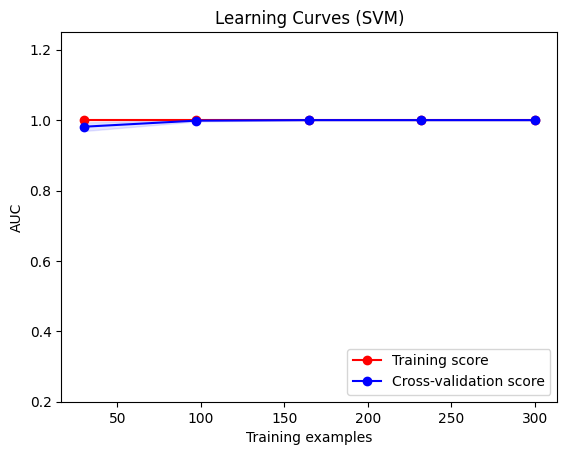

In [ ]:
title = "Learning Curves (SVM)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
svc = SVC(kernel='linear',degree=3, C=13)                               # fill this in
plot_learning_curve(svc, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('SVM_curve.pdf', transparent=True, dpi=300)
plt.savefig('SVM_curve.eps', transparent=True, dpi=300)
plt.show()

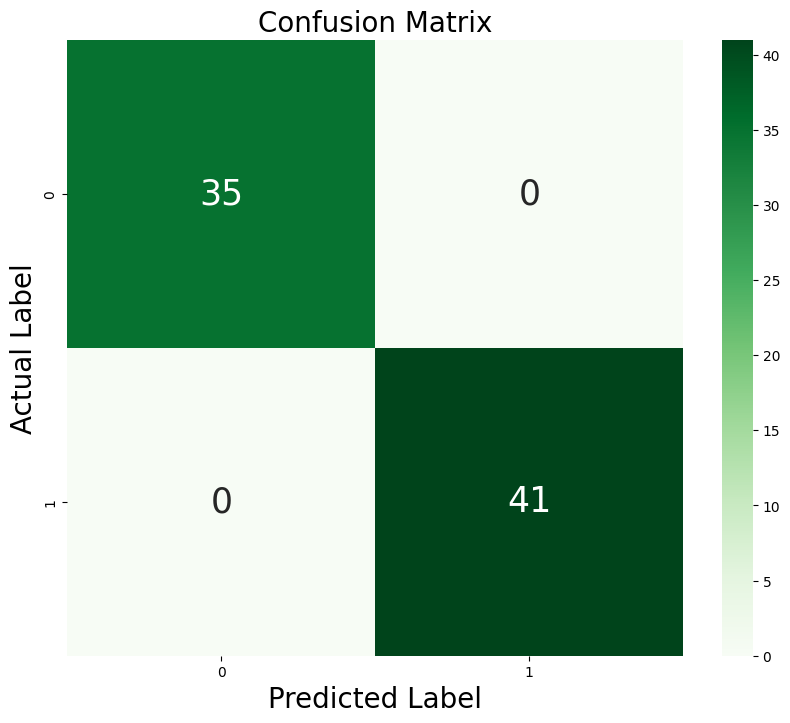

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('SVC_confusion.pdf', transparent=True, dpi=300)
plt.savefig('SVC_confusion.eps', transparent=True, dpi=300)

##Random Forest Classifier

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#criterion used in trees
criterion = ['entropy','gini']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=5, verbose=2,
                               random_state=100, n_jobs=-1)
#fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(rf_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([3.11827421e-01, 2.48530302e+00, 3.31826882e+00, 1.85647011e-03,
       4.03871250e-01, 9.16276073e-01, 3.76534595e+00, 3.07931900e-03,
       2.17621970e+00, 9.30923271e-01, 8.05139542e-04, 7.60889053e-04,
       6.88121605e-01, 2.44107246e-03, 9.14097977e-01, 8.44907761e-04,
       2.72835569e+00, 9.46919441e-01, 8.56781006e-04, 3.35348883e+00,
       3.01415157e-01, 9.46950912e-04, 3.14628644e+00, 9.16147232e-04,
       1.84311295e+00, 8.37802887e-04, 1.32278247e+00, 8.60468817e-01,
       1.21897197e+00, 3.05141020e-01, 7.95269012e-04, 1.23047009e+00,
       8.22544098e-04, 2.17939634e+00, 3.03795676e+00, 2.80141716e+00,
       8.33749771e-04, 2.64489374e+00, 8.59785080e-04, 3.04088330e+00,
       8.24260712e-04, 3.46813650e+00, 1.23376031e+00, 8.42809677e-04,
       7.88068771e-04, 7.84492493e-04, 1.24014001e+00, 2.56722817e+00,
       2.91305547e+00, 1.14434876e+00, 8.08477402e-04, 3.09220548e+00,
       2.43302622e+00, 9.16999531e-01, 7.864

In [ ]:
print('\n Best estimator:')
print(rf_randomcv.best_estimator_)


 Best estimator:
RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=6,
                       min_samples_split=14, n_estimators=200)


In [ ]:
print('\n Best hyperparameters:')
print(rf_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 600, min_samples_split = 5, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 10, criterion = 'gini')
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=600)

In [ ]:
y_pred_rf = rf.predict(X_test)
model_report(y_test, y_pred_rf)

Accuracy = 0.9342105263157895
Precision = 0.9090909090909091
Recall/Sensitivity = 0.975609756097561
Specificity = 0.8857142857142857
F1 Score = 0.9411764705882353
AUC Score = 0.9306620209059233
Kappa Score = 0.8667601683029453
Log Loss = 2.3712929861261283 



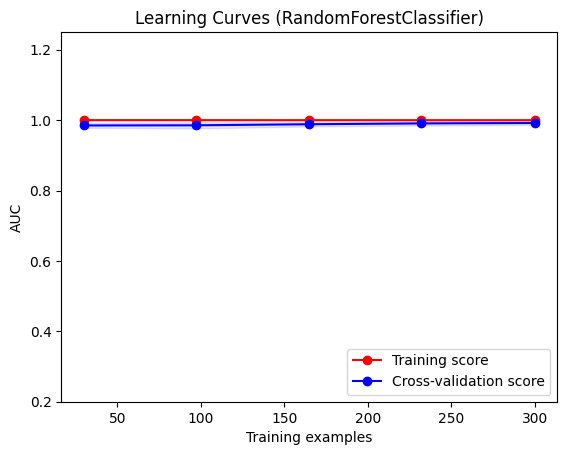

In [ ]:
title = "Learning Curves (RandomForestClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 1000, criterion = 'entropy')                             # fill this in
plot_learning_curve(rf, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('RF_curve.pdf', transparent=True, dpi=300)
plt.savefig('RF_curve.eps', transparent=True, dpi=300)
plt.show()

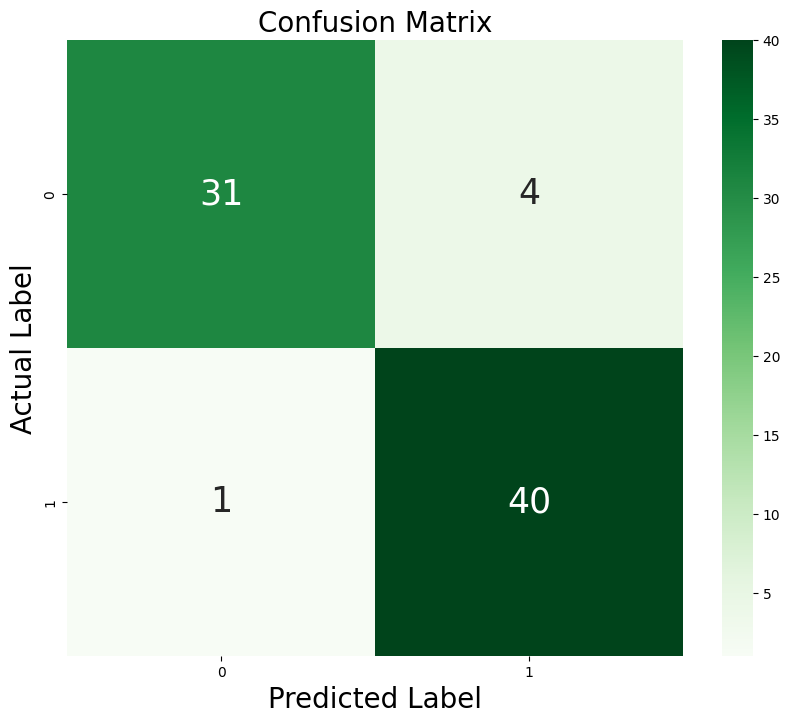

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('RF_confusion.pdf', transparent=True, dpi=300)
plt.savefig('RF_confusion.eps', transparent=True, dpi=300)

##DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_dict ={
             "criterion":['gini','entropy'],
             "max_depth":(150, 155, 160),
             "min_samples_split":range(1,10),
             "min_samples_leaf":range(1,5)
 }

decision_tree = DecisionTreeClassifier(random_state=42)

dt_decision_tree=RandomizedSearchCV(estimator=decision_tree, param_distributions=param_dict, n_iter=100, cv=5, verbose=2,
                               random_state=100,n_jobs=-1)
#fit the randomized model
dt_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': (150, 155, 160),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)},
                   random_state=100, verbose=2)

In [ ]:
print('\n All results:')
print(dt_decision_tree.cv_results_)


 All results:
{'mean_fit_time': array([0.00409131, 0.00308962, 0.00309014, 0.0026803 , 0.00332837,
       0.0037992 , 0.00266204, 0.00271239, 0.0038259 , 0.00272408,
       0.00295782, 0.00410595, 0.00309854, 0.00268068, 0.00695238,
       0.00285873, 0.00306306, 0.00066147, 0.00286846, 0.00402813,
       0.00272822, 0.00276413, 0.00273805, 0.00297098, 0.00508766,
       0.0026639 , 0.00271592, 0.00259099, 0.00272393, 0.00315514,
       0.00271816, 0.00068893, 0.00265908, 0.00262308, 0.00395665,
       0.00286555, 0.00427928, 0.00276732, 0.00271063, 0.00272908,
       0.00270538, 0.00066967, 0.00293031, 0.00276198, 0.00279231,
       0.00280008, 0.00271873, 0.00381069, 0.00292339, 0.00306196,
       0.00265837, 0.00277977, 0.0026794 , 0.00291591, 0.00069604,
       0.00065274, 0.00278573, 0.00277348, 0.0047503 , 0.00265799,
       0.00274315, 0.00271988, 0.00271831, 0.00483713, 0.00067606,
       0.00274072, 0.00279646, 0.00277586, 0.00284901, 0.00439939,
       0.00306506, 0.00280995

In [ ]:
print('\n Best estimator:')
print(dt_decision_tree.best_estimator_)


 Best estimator:
DecisionTreeClassifier(max_depth=150, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(dt_decision_tree.best_params_)


 Best hyperparameters:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 150, 'criterion': 'gini'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt = DecisionTreeClassifier(min_samples_split = 9, min_samples_leaf = 1, max_depth = 150, criterion = 'entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=150, min_samples_split=9)

In [ ]:
y_pred_dt = dt.predict(X_test)
model_report(y_test, y_pred_dt)

Accuracy = 0.881578947368421
Precision = 0.8478260869565217
Recall/Sensitivity = 0.9512195121951219
Specificity = 0.8
F1 Score = 0.896551724137931
AUC Score = 0.875609756097561
Kappa Score = 0.7591549295774648
Log Loss = 4.268327375027031 



In [ ]:
# Extract the best model from RandomizedSearchCV
best_dt = dt_decision_tree.best_estimator_
print(f"\nBest Decision Tree Model: {best_dt}")

# Ensure the best model is fitted
best_dt.fit(X_train, y_train)  # This step ensures it's trained before use

# Predictions
y_train_pred_dt = best_dt.predict(X_train)
y_pred_dt = best_dt.predict(X_test)

# Compute accuracy
train_acc_dt = accuracy_score(y_train, y_train_pred_dt)  # Fixed variable name
test_acc_dt = accuracy_score(y_test, y_pred_dt)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_dt * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_dt * 100:.2f}%")



Best Decision Tree Model: DecisionTreeClassifier(max_depth=150, random_state=42)
Training Accuracy: 100.00%
Testing Accuracy: 86.84%


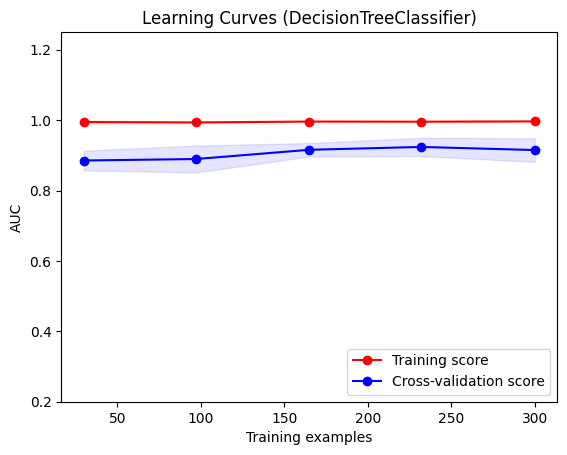

In [ ]:
title = "Learning Curves (DecisionTreeClassifier)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 3, max_depth = 160, criterion = 'gini')                             # fill this in
plot_learning_curve(dt, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('DT_curve.pdf', transparent=True, dpi=300)
plt.savefig('DT_curve.eps', transparent=True, dpi=300)
plt.show()

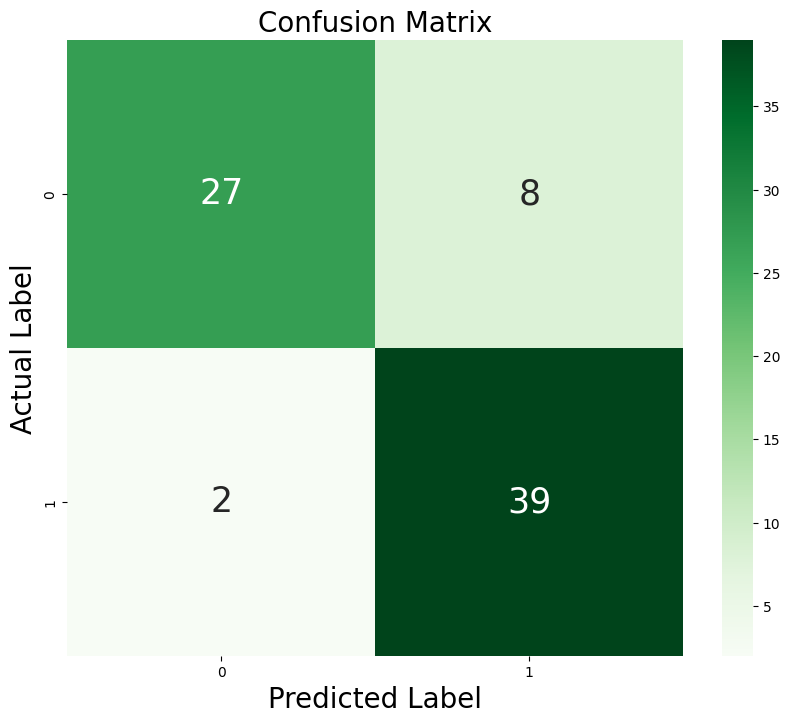

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('DT_confusion.pdf', transparent=True, dpi=300)
plt.savefig('DT_confusion.eps', transparent=True, dpi=300)

##XGBClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best hyperparameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1}

=== XGBoost Model ===
Training Accuracy: 100.00%
Testing Accuracy: 90.79%

Accuracy = 0.9078947368421053
Precision = 0.8863636363636364
Recall/Sensitivity = 0.9512195121951219
Specificity = 0.8571428571428571
F1 Score = 0.9176470588235294
AUC Score = 0.9041811846689896
Kappa Score = 0.8134642356241234
Log Loss = 3.3198101805765803 



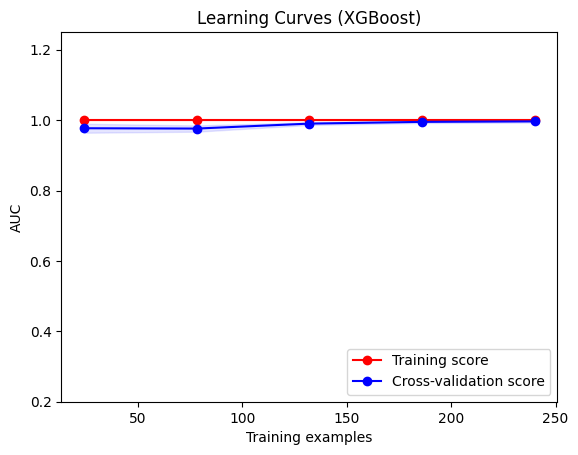

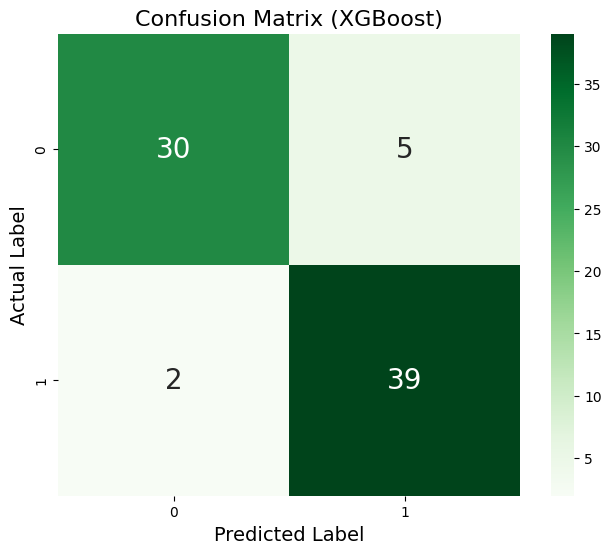

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Encode target labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define XGBoost classifier
estimator = XGBClassifier(objective='binary:logistic', nthread=4, seed=42)

# Define hyperparameter grid
parameters = {
    'max_depth': range(3, 10),  # Avoid depth=2 for better generalization
    'n_estimators': range(100, 300, 50),  # Increase range for more exploration
    'learning_rate': [0.01, 0.05, 0.1]
}

# Perform randomized search
xg_randomcv = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    verbose=True,
    n_iter=20  # Limit iterations for efficiency
)

# Fit the model
xg_randomcv.fit(X_train, y_train_encoded)

# Print best parameters
print('\n Best hyperparameters:', xg_randomcv.best_params_)

# Train best model
best_params = xg_randomcv.best_params_
xg = XGBClassifier(**best_params)
xg.fit(X_train, y_train_encoded)

# Predictions
y_pred_xg = xg.predict(X_test)

# Compute Training & Testing Accuracy
y_train_pred_xg = xg.predict(X_train)
train_acc_xg = accuracy_score(y_train_encoded, y_train_pred_xg)
test_acc_xg = accuracy_score(y_test_encoded, y_pred_xg)

# Print Accuracies
print("\n=== XGBoost Model ===")
print(f"Training Accuracy: {train_acc_xg * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_xg * 100:.2f}%\n")

# Generate model report
model_report(pd.Series(y_test_encoded), pd.Series(y_pred_xg))

# Learning Curve
title = "Learning Curves (XGBoost)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(xg, title, X_train, y_train_encoded, ylim=(0.2, 1.25), cv=cv, n_jobs=-1)

plt.savefig('XG_curve.pdf', transparent=True, dpi=300)
plt.savefig('XG_curve.eps', transparent=True, dpi=300)
plt.show()

# Confusion Matrix
cm_xg = confusion_matrix(y_test_encoded, y_pred_xg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_xg, cmap="Greens", annot=True, fmt='d', square=True, annot_kws={"size": 20})
plt.title('Confusion Matrix (XGBoost)', fontsize=16)
plt.ylabel('Actual Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)

# Save confusion matrix
plt.savefig('XGBoost_confusion.pdf', transparent=True, dpi=300)
plt.savefig('XGBoost_confusion.eps', transparent=True, dpi=300)
plt.show()


In [ ]:
print('\n Best hyperparameters:')
print(xg_randomcv.best_params_)


 Best hyperparameters:
{'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1}


##LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'],
               'C': [0.001,0.01,0.1,1,10,100,1000]}
lr=LogisticRegression(random_state=42)
lr_randomcv = RandomizedSearchCV(lr, param_distributions=grid_values, cv=5)
#fit the randomized model
lr_randomcv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']})

In [ ]:
print('\n All results:')
print(lr_randomcv.cv_results_)


 All results:
{'mean_fit_time': array([0.00072327, 0.00533686, 0.00056987, 0.0031848 , 0.0031951 ,
       0.00055156, 0.0041203 , 0.00473781, 0.00410995, 0.00054522]), 'std_fit_time': array([1.50921077e-04, 3.36570081e-03, 1.65987282e-05, 1.04562463e-04,
       7.43547090e-05, 1.88145949e-05, 1.57083463e-04, 8.88181849e-04,
       1.15555208e-03, 7.68788093e-06]), 'mean_score_time': array([0.        , 0.00155959, 0.        , 0.00139337, 0.00139356,
       0.        , 0.00138059, 0.00138617, 0.00137324, 0.        ]), 'std_score_time': array([0.00000000e+00, 1.85428085e-04, 0.00000000e+00, 1.22885293e-05,
       3.41895900e-05, 0.00000000e+00, 2.65320353e-06, 1.56639373e-05,
       6.99570653e-06, 0.00000000e+00]), 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l2', 'l1', 'l2', 'l2', 'l2',
                   'l1'],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value=np.str_('?'),
            dtype=o

In [ ]:
print('\n Best estimator:')
print(lr_randomcv.best_estimator_)


 Best estimator:
LogisticRegression(C=1000, random_state=42)


In [ ]:
print('\n Best hyperparameters:')
print(lr_randomcv.best_params_)


 Best hyperparameters:
{'penalty': 'l2', 'C': 1000}


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'l2', C = 1000 , random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1000, random_state=42)

In [ ]:
y_pred_lr = lr.predict(X_test)
model_report(y_test, y_pred_lr)

Accuracy = 1.0
Precision = 1.0
Recall/Sensitivity = 1.0
Specificity = 1.0
F1 Score = 1.0
AUC Score = 1.0
Kappa Score = 1.0
Log Loss = 2.2204460492503136e-16 



In [ ]:
from sklearn.metrics import accuracy_score
# Create and train the model
lr = LogisticRegression(penalty='l2', C=1000)
lr.fit(X_train, y_train)  # This line is crucial and was likely missing

# Predict on training data
y_train_pred_lr = lr.predict(X_train)

# Predict on testing data
y_pred_lr = lr.predict(X_test)

# Compute accuracy
train_acc_lr = accuracy_score(y_train, y_train_pred_lr)
test_acc_lr = accuracy_score(y_test, y_pred_lr)

# Print accuracy scores
print(f"Training Accuracy: {train_acc_lr * 100:.2f}%")
print(f"Testing Accuracy: {test_acc_lr * 100:.2f}%")


Training Accuracy: 100.00%
Testing Accuracy: 100.00%


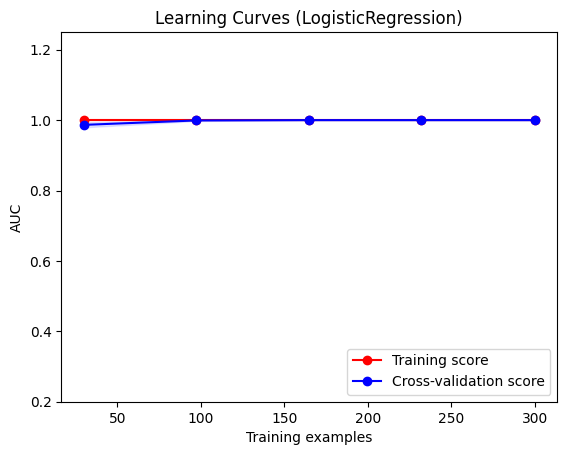

In [ ]:
title = "Learning Curves (LogisticRegression)"                                        # fill this in
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
lr = LogisticRegression(penalty = 'l2', C = 1000)                            # fill this in
plot_learning_curve(lr, title, X, y, ylim=(0.2, 1.25), cv=cv, n_jobs=4)
plt.savefig('LR_curve.pdf', transparent=True, dpi=300)
plt.savefig('LR_curve.eps', transparent=True, dpi=300)
plt.show()

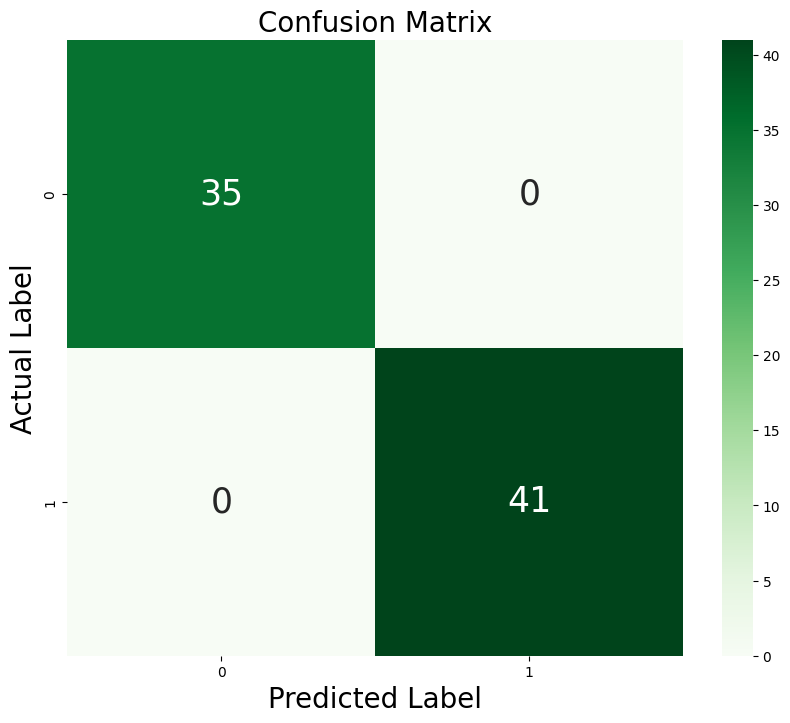

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 8))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, annot_kws={"size": 25})
plt.title('Confusion Matrix', fontsize=20)
ax.set_ylabel('Actual Label', fontsize=20)
ax.set_xlabel('Predicted Label', fontsize=20)
plt.savefig('LR_confusion.pdf', transparent=True, dpi=300)
plt.savefig('LR_confusion.eps', transparent=True, dpi=300)

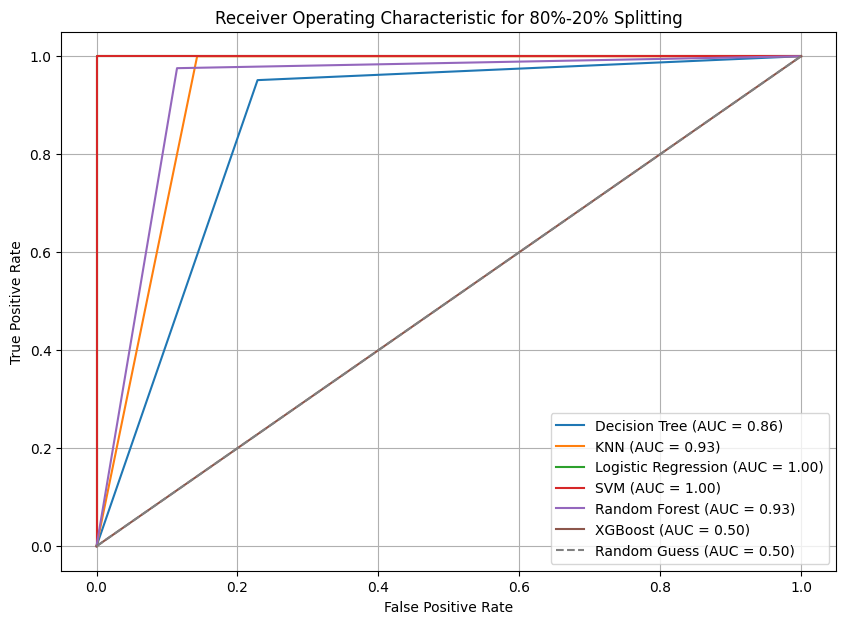

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Encode y_test ('YES' -> 1, 'NO' -> 0)
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Ensure all predictions are encoded to match (0 or 1)
y_pred_dt_encoded = np.where(y_pred_dt == 'YES', 1, 0)
y_pred_knn_encoded = np.where(y_pred_knn == 'YES', 1, 0)
y_pred_LR_encoded = np.where(y_pred_lr == 'YES', 1, 0)
y_pred_svc_encoded = np.where(y_pred_svc == 'YES', 1, 0)
y_pred_rf_encoded = np.where(y_pred_rf == 'YES', 1, 0)
y_pred_xg_encoded = np.where(y_pred_xg == 'YES', 1, 0)

# Compute ROC curves and AUC scores
models = {
    "Decision Tree": y_pred_dt_encoded,
    "KNN": y_pred_knn_encoded,
    "Logistic Regression": y_pred_LR_encoded,
    "SVM": y_pred_svc_encoded,
    "Random Forest": y_pred_rf_encoded,
    "XGBoost": y_pred_xg_encoded
}

plt.figure(figsize=(10, 7))

for model_name, y_pred in models.items():
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot Random Guess (Baseline)
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess (AUC = 0.50)")

# Formatting the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic for 80%-20% Splitting")
plt.legend(loc="lower right")
plt.grid()

# Save the figure
plt.savefig('all_roc.pdf', transparent=True, dpi=300)
plt.savefig('all_roc.eps', transparent=True, dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, cohen_kappa_score, log_loss, roc_curve
)

# Create an empty list to store results
model_metrics = []

def model_report(model_name, y_true, y_pred):
    """
    Computes classification metrics for a given model and appends results to a list in percentage format.
    """
    # Basic metrics in percentage
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred) * 100
    recall = recall_score(y_true, y_pred) * 100
    f1 = f1_score(y_true, y_pred) * 100
    auc = roc_auc_score(y_true, y_pred) * 100

    # Specificity calculation: TN / (TN + FP)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = (tn / (tn + fp)) * 100 if (tn + fp) != 0 else 0

    # AUC Score Calculation
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred) * 100

    # Kappa Score & Log Loss
    kappa = cohen_kappa_score(y_true, y_pred) * 100
    logloss = log_loss(y_true, y_pred)

    # Append results to the list
    model_metrics.append({
        "Model": model_name,
        "Accuracy (%)": round(accuracy, 2),
        "Precision (%)": round(precision, 2),
        "Recall (%)": round(recall, 2),
        "Specificity (%)": round(specificity, 2),
        "F1 Score (%)": round(f1, 2),
        "AUC Score (%)": round(auc_score, 2),
        "Kappa Score (%)": round(kappa, 2),
        "Log Loss": round(logloss, 4)
    })

# Example: Call model_report for each model
model_report("Decision Tree", y_test_encoded, y_pred_dt_encoded)
model_report("KNN", y_test_encoded, y_pred_knn_encoded)
model_report("Logistic Regression", y_test_encoded, y_pred_LR_encoded)
model_report("SVM", y_test_encoded, y_pred_svc_encoded)
model_report("Random Forest", y_test_encoded, y_pred_rf_encoded)
model_report("XGBoost", pd.Series(y_test_encoded), pd.Series(y_pred_xg))

# Convert list to DataFrame
df_metrics = pd.DataFrame(model_metrics)

# Display final metrics table
print(df_metrics)


                 Model  Accuracy (%)  Precision (%)  Recall (%)  \
0        Decision Tree         86.84          82.98       95.12   
1                  KNN         93.42          89.13      100.00   
2  Logistic Regression        100.00         100.00      100.00   
3                  SVM        100.00         100.00      100.00   
4        Random Forest         93.42          90.91       97.56   
5              XGBoost         90.79          88.64       95.12   

   Specificity (%)  F1 Score (%)  AUC Score (%)  Kappa Score (%)  Log Loss  
0            77.14         88.64          86.13            73.18    4.7426  
1            85.71         94.25          92.86            86.62    2.3713  
2           100.00        100.00         100.00           100.00    0.0000  
3           100.00        100.00         100.00           100.00    0.0000  
4            88.57         94.12          93.07            86.68    2.3713  
5            85.71         91.76          90.42            81.35    

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Encode y_test
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # Convert "YES"/"NO" to 1/0

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_xg) * 100
print("XGBoost Accuracy:", accuracy)
y_pred_xg_categorical = le.inverse_transform(y_pred_xg)  # Convert 0/1 to "YES"/"NO"
accuracy = accuracy_score(y_test, y_pred_xg_categorical) * 100
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 90.78947368421053
XGBoost Accuracy: 90.78947368421053


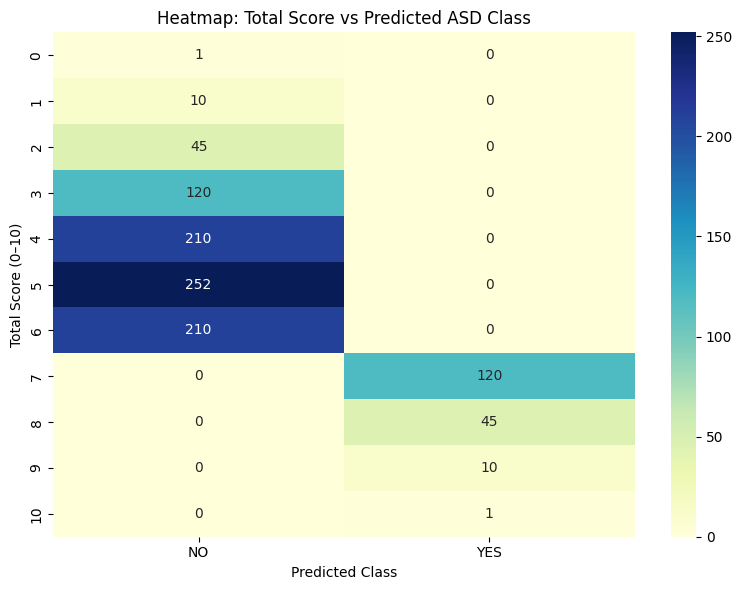

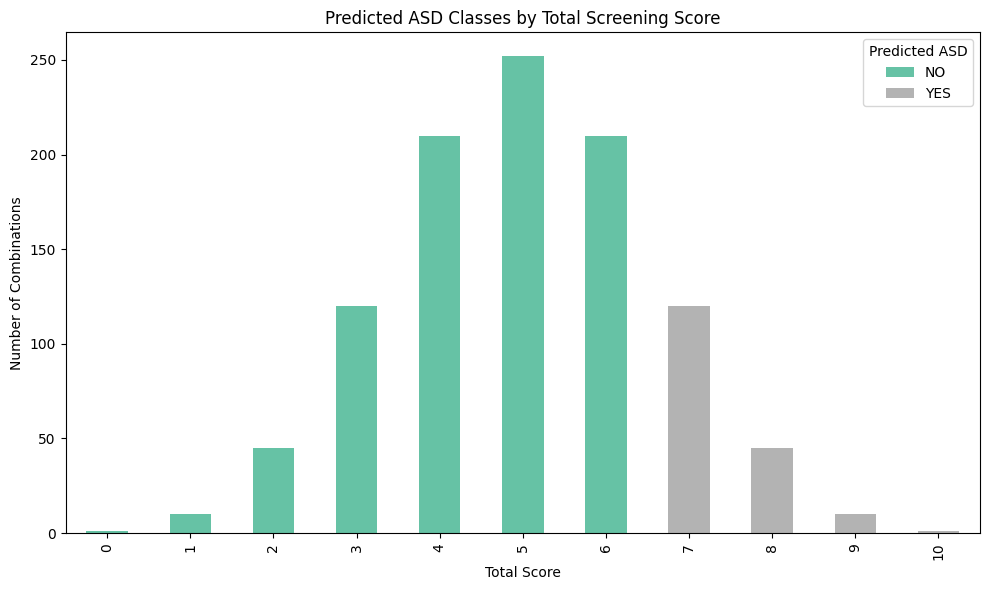

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = adu.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = SVC(kernel='linear', degree=3, C=13, probability=True)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations: {acc * 100:.2f}%")

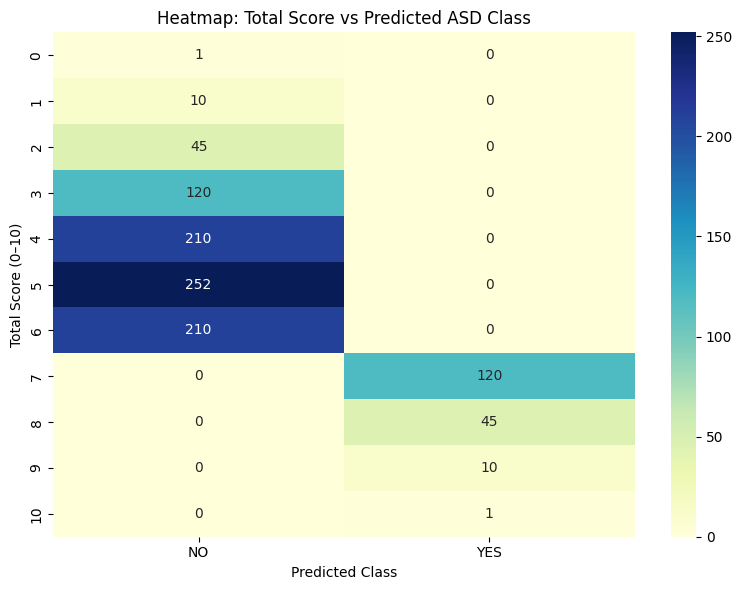

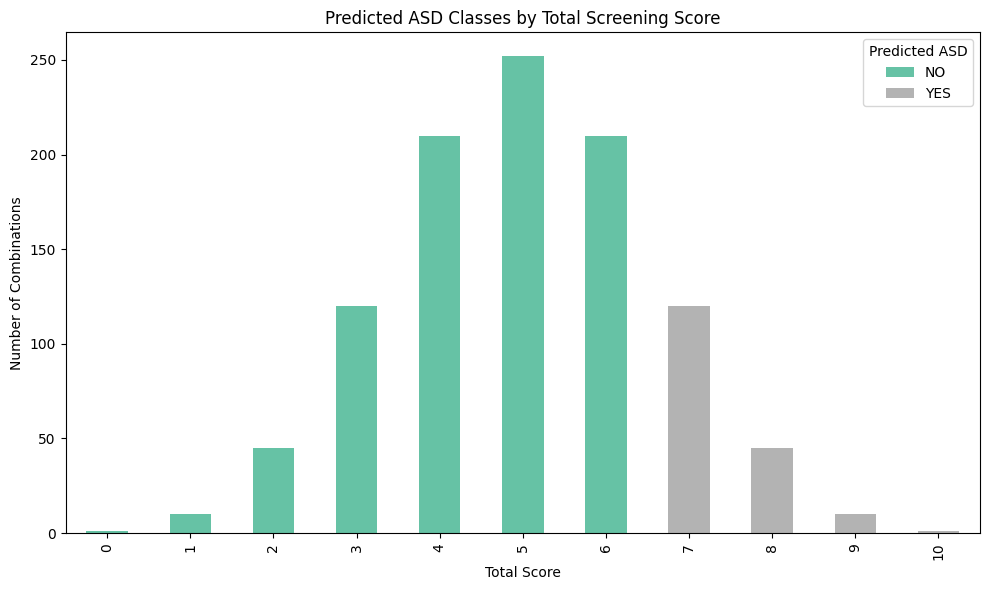

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0          0         0         0         0         0         0         0   
1          0         0         0         0         0         0         0   
2          0         0         0         0         0         0         0   
3          0         0         0         0         0         0         0   
4          0         0         0         0         0         0         0   
5          0         0         0         0         0         0         0   
6          0         0         0         0         0         0         0   
7          0         0         0         0         0         0         0   
8          0         0         0         0         0         0         1   
9          0         0         0         0         0         0         1   
10         0         0         0         0         0         0         1   
11         0         0         0         0         0         0         1   
12         0

In [ ]:
import pandas as pd
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression  # or use SVC
from sklearn.metrics import accuracy_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- STEP 1: Load and prepare training data ----------
# Assume 'ch' is already defined as your full original dataset
df = adu.copy()

# Drop irrelevant/leakage columns
df = df.drop(columns=['result'], errors='ignore')

# Encode target
label_encoder = LabelEncoder()
df['Class/ASD'] = label_encoder.fit_transform(df['Class/ASD'])  # YES=1, NO=0

# Fill missing values
df.fillna(method='ffill', inplace=True)

# Features and target
selected_features = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
                     'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
X = df[selected_features]
y = df['Class/ASD']

# ---------- STEP 2: Train model ----------
model = LogisticRegression(penalty='l1', C=1000, solver='liblinear', random_state=42)
model.fit(X, y)

# ---------- STEP 3: Generate all 2^10 = 1024 combinations ----------
binary_combos = list(product([0, 1], repeat=10))
test_df = pd.DataFrame(binary_combos, columns=selected_features)

# ---------- STEP 4: Predict on all combinations ----------
# *** The fix: Create a copy of test_df for prediction ***
test_df_for_prob = test_df.copy()
test_df['Predicted_Label'] = model.predict(test_df_for_prob)
test_df['Predicted_Prob'] = model.predict_proba(test_df_for_prob)[:, 1]
test_df['Predicted_ASD'] = label_encoder.inverse_transform(test_df['Predicted_Label'])
test_df['Total_Score'] = test_df[selected_features].sum(axis=1)

# ---------- STEP 5: Visualize as heatmap ----------
pivot = test_df.pivot_table(index='Total_Score', columns='Predicted_ASD', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap: Total Score vs Predicted ASD Class")
plt.xlabel("Predicted Class")
plt.ylabel("Total Score (0–10)")
plt.tight_layout()
plt.show()

# ---------- STEP 6: Visualize as bar plot ----------
score_dist = test_df.groupby(['Total_Score', 'Predicted_ASD']).size().unstack().fillna(0)
score_dist.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Predicted ASD Classes by Total Screening Score")
plt.xlabel("Total Score")
plt.ylabel("Number of Combinations")
plt.legend(title="Predicted ASD")
plt.tight_layout()
plt.show()

# ---------- STEP 7: Show and optionally save ----------
print(test_df.head(15))
test_df.to_csv("all_ASD_question_combinations_predictions.csv", index=False)

# ---------- STEP 8: Calculate accuracy of threshold behavior ----------
# Since no ground truth exists, you can define a threshold (e.g., Total_Score >= 7 means ASD)
test_df['Expected_Label'] = np.where(test_df['Total_Score'] >= 7, 1, 0)
acc = accuracy_score(test_df['Expected_Label'], test_df['Predicted_Label'])
print(f"Model accuracy on all 1024 combinations: {acc * 100:.2f}%")